# Orientation coherence of the Monet stimulus

Here $X(\nu, \varphi)$ is the Fourier transform of the initial noise image represented in polar coordinates $(\nu, \varphi)$ where $\nu$ is the spatial frequency along along direction angle $\varphi$.

To impart orientation coherence to noise movies in the Monet stimulus, the noise image is filtered with an orientation band-pass filter $G(\varphi, c)$ the oriented noise:

$$\hat X(\nu \varphi; c) = G(\varphi-\theta; c) X(\nu, \varphi)$$

The parameter $c$ is the *coherence*. 

The orientation filter is constructed as 
$$G(\omega; c) = \sqrt{c}H(c \omega)$$

where $$H(\omega) = \begin{cases} \frac 1 2 + \frac 1 2 \cos \omega \quad & \text{if } |\omega| < \pi
\\ 0 \quad & \text{otherwise}\end{cases}$$
is the Hanning function.

Let's consider two common coherence values $c = 2.5$ and $c=4.0$. 

The corresponding angular filters look as follows:

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
d = 100

In [3]:
from scipy.ndimage import gaussian_filter
X = gaussian_filter(np.random.randn(d*2,d*2), 5)*5

In [4]:
x, y = np.meshgrid(np.r_[-d:d], np.r_[-d:d])
Z = x + 1j * y
phi = np.angle(Z)

In [5]:
def hann(phi):
    return (0.5 + 0.5*np.cos(phi)) * (abs(phi) < np.pi)

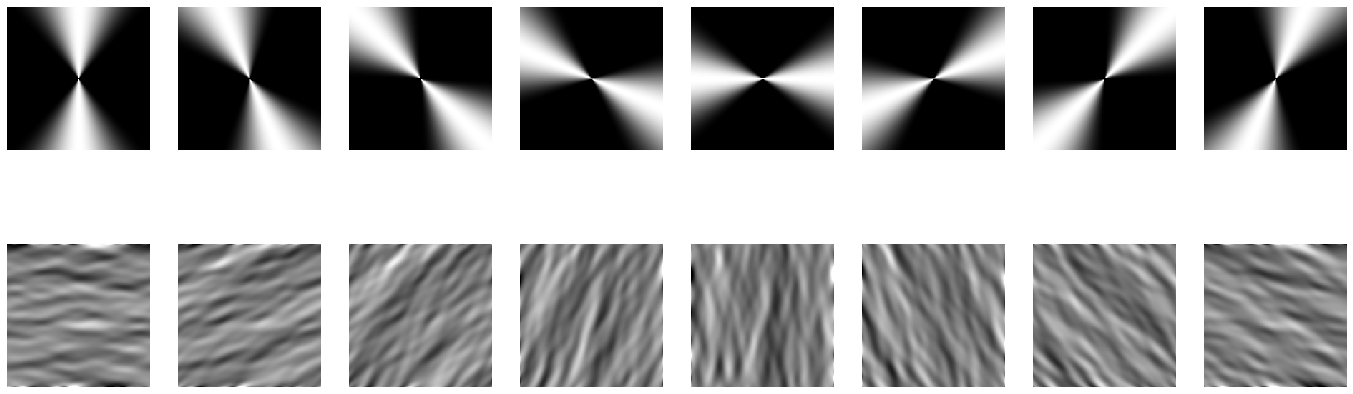

In [6]:
nori = 8
c = 4.0
cumulative_filter  = 0.0
cumulative_image = 0.0
F = np.fft.fft2(X)
fig, axx = plt.subplots(2, nori, figsize=(24,8))
ori_range = np.r_[0:np.pi:np.pi/nori]
for ax, ori in zip(axx.T, ori_range):
    q = np.mod(phi + ori, np.pi) - np.pi/2
    H = np.sqrt(c) * hann(q*c)
    oriented_image = np.real(np.fft.ifft2(F * np.fft.ifftshift(H)))
    cumulative_filter += H
    cumulative_image += oriented_image
    ax[0].imshow(H, cmap='gray')
    ax[0].axis(False)
    ax[1].imshow(oriented_image, cmap='gray', vmin=-1, vmax=1)
    ax[1].axis(False)

Since all the oriented filters average to a uniform unity plane in the frequency domain, the overal spatial spectrum of the oriented noise remains the same as of the original unfiltered movie when averaged over periods of oriented frequencies. This property makes it possible to compute linear receptive fields from oriented movies equivalently to unfiltered noise. This assumption holds for the purely linear component of the response.

To illustrate, the figure below depicts the original noise frame and the average of the eight frames above. 

(-0.5, 199.5, 199.5, -0.5)

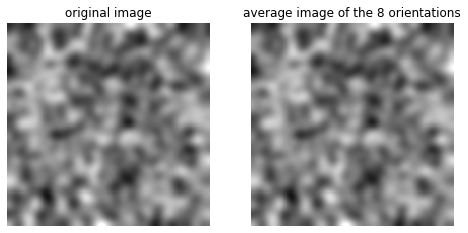

In [7]:
fig, axx = plt.subplots(1,2, figsize=(8,5))
ax = axx[0]
ax.imshow(X, cmap='gray', vmin=-1, vmax=1)
ax.set_title('original image')
ax.axis(False)

ax = axx[1]
ax.imshow(cumulative_image / nori * np.sqrt(c), cmap='gray', vmin=-1, vmax=1)
ax.set_title('average image of the 8 orientations')
ax.axis(False)

# Interpretation of the coherence coefficient *c*.

The coherence coefficient $c$ sets the narrowness of the orientation band. For $c>2$, it may be thought of as the inverse fraction of all orientations.  Thus $c=2$ corresponds to passing $1/2$ of all orientations and $c=4$ a forth of all orientations.

The half-width at half amplitude of the filter is $\text{FWHA}=\frac{\pi}{c}$, or $\pm \frac{\pi} {2c}$ of the main orientation. Thus for $c=2.5$, for example, this corresponds to passing half of the amplitude at $36^\circ$ from main orientation and zero amplitude at $72^\circ$ from the main orientation.

The figure below depicts the orientation band filter for $c \in \{1.5, 2.5, 4.0\}$.

Text(0, 0.5, 'pass')

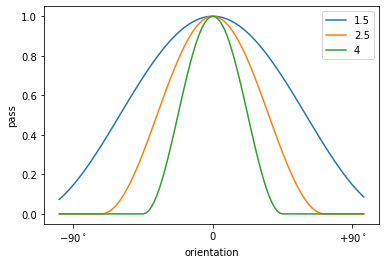

In [8]:
x = np.r_ [-0.55*np.pi:0.55*np.pi:np.pi/100]
cs = (1.5, 2.5, 4)
for c in cs:
    plt.plot(x, hann(x*c))
plt.xticks(np.array([-0.5, 0, 0.5])*np.pi, ['$-90^\circ$', '0', '$+90^\circ$'])
plt.legend(cs)
plt.xlabel('orientation')
plt.ylabel('pass')